In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory(in GB),Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1079,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128 SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1080,1080,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512 SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1081,1081,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64 Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1082,1082,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.shape

(1084, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1084 non-null   int64  
 1   Company           1084 non-null   object 
 2   TypeName          1084 non-null   object 
 3   Inches            1084 non-null   float64
 4   ScreenResolution  1084 non-null   object 
 5   Cpu               1084 non-null   object 
 6   Ram               1084 non-null   object 
 7   Memory(in GB)     1084 non-null   object 
 8   Gpu               1084 non-null   object 
 9   OpSys             1084 non-null   object 
 10  Weight            1084 non-null   object 
 11  Price             1084 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 101.8+ KB


In [6]:
df.duplicated().sum() # To find the number of duplicate rows

0

In [7]:
df.isnull().sum() # To find number of missing values

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory(in GB)       0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True) # Remove the unneccasry column 

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory(in GB),Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
df['Ram'] = df['Ram'].str.replace('GB', '') # We do not need this
df['Weight'] = df['Weight'].str.replace('kg', '') # We do not need this

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory(in GB),Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
df['Ram'] = df['Ram'].astype('int64')
df['Weight'] = df['Weight'].astype('float64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1084 non-null   object 
 1   TypeName          1084 non-null   object 
 2   Inches            1084 non-null   float64
 3   ScreenResolution  1084 non-null   object 
 4   Cpu               1084 non-null   object 
 5   Ram               1084 non-null   int64  
 6   Memory(in GB)     1084 non-null   object 
 7   Gpu               1084 non-null   object 
 8   OpSys             1084 non-null   object 
 9   Weight            1084 non-null   float64
 10  Price             1084 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 93.3+ KB


C:\Users\devan\AppData\Local\Temp\ipykernel_12328\1699719418.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price']) # To see the general spread of laptop prices


<Axes: xlabel='Price', ylabel='Density'>

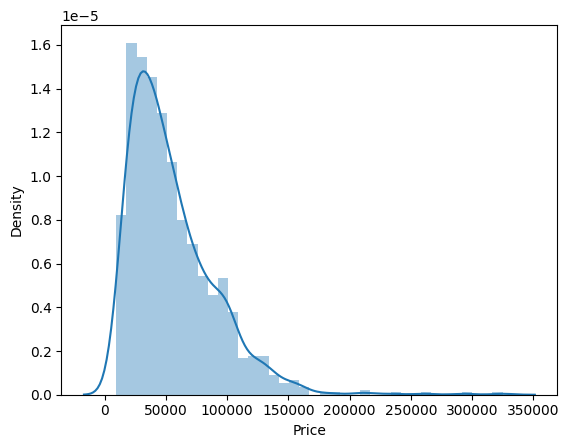

In [14]:
sns.distplot(df['Price']) # To see the general spread of laptop prices
# Data is slighty skewed, we can fix this later

<Axes: xlabel='Company'>

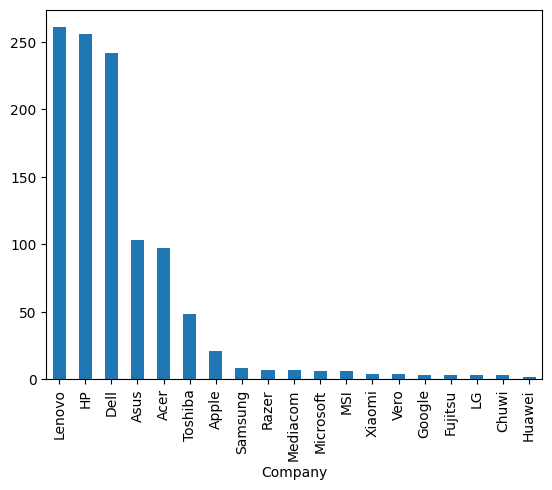

In [15]:
df['Company'].value_counts().plot(kind = 'bar') # To see number of laptops of each company

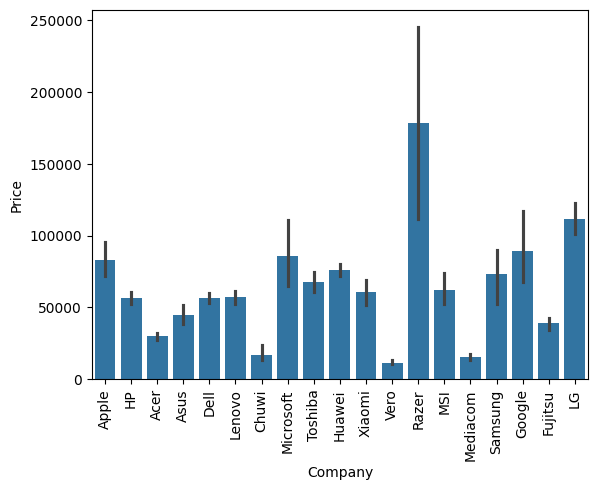

In [16]:
sns.barplot(x = df['Company'], y = df['Price']) # To see everage prices of each comapny laptops
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='TypeName'>

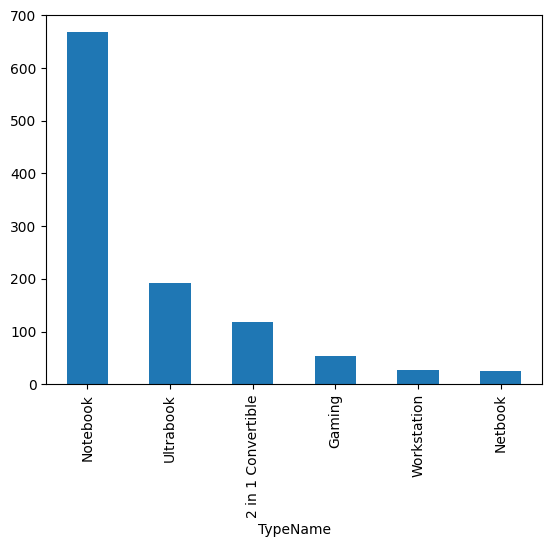

In [17]:
df['TypeName'].value_counts().plot(kind = 'bar') # To see number of different types of laptops

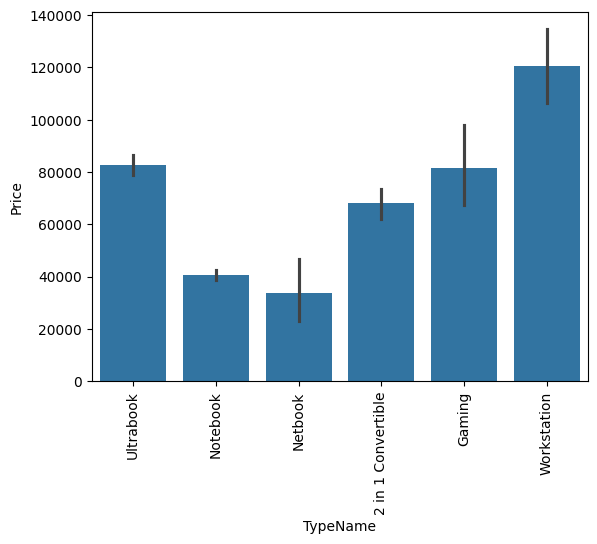

In [18]:
sns.barplot(x = df['TypeName'], y = df['Price']) # To see everage prices of each type of laptops
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

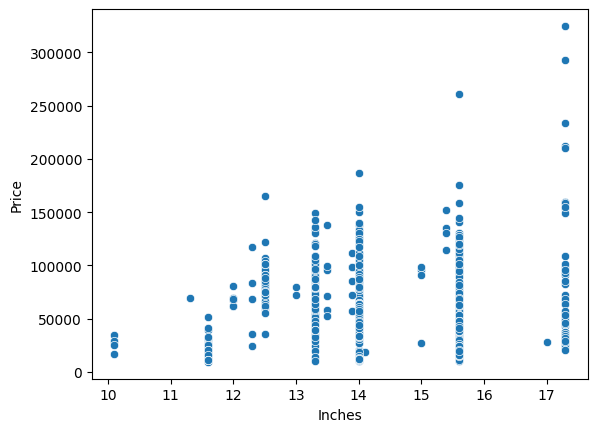

In [19]:
sns.scatterplot(x = df['Inches'], y = df['Price']) # To see how screen size affects the price of laptops.
# Here we can see we do not have a very strong relation between screen size and the price

In [20]:
df['ScreenResolution'].value_counts() # To see number of different types of Screen Resolutions

ScreenResolution
Full HD 1920x1080                                383
1366x768                                         280
IPS Panel Full HD 1920x1080                      160
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   45
1600x900                                          19
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel 4K Ultra HD 3840x2160                    5
IPS Panel Touchscreen 1920x12

In [21]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

<Axes: xlabel='Touchscreen'>

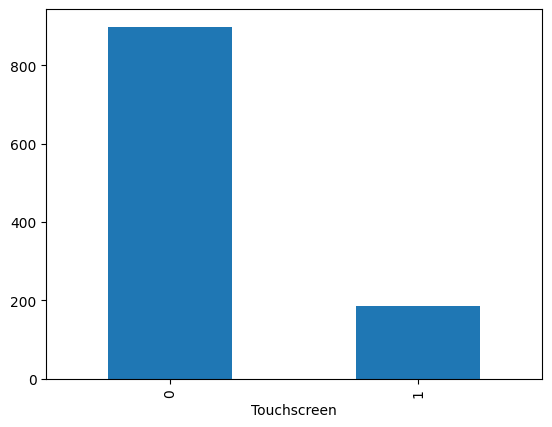

In [22]:
df['Touchscreen'].value_counts().plot(kind = 'bar') # To see number of touchscreen and non-touchscreen laptops

<Axes: xlabel='Touchscreen', ylabel='Price'>

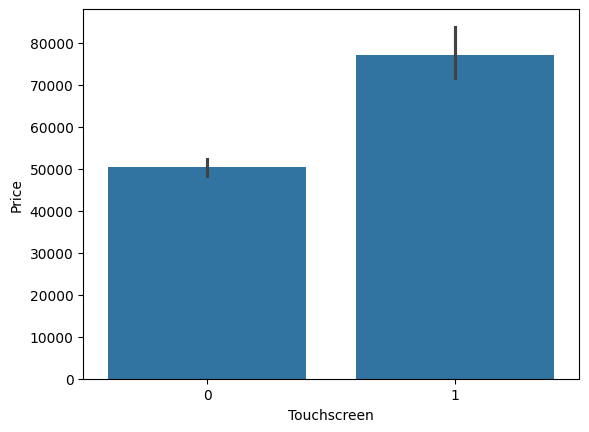

In [23]:
sns.barplot(x = df['Touchscreen'], y = df['Price'])
# There is a strong relation between touchscreen and price
# If laptop is touchscreen, the price increases

In [24]:
df['IPS'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory(in GB),Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='IPS'>

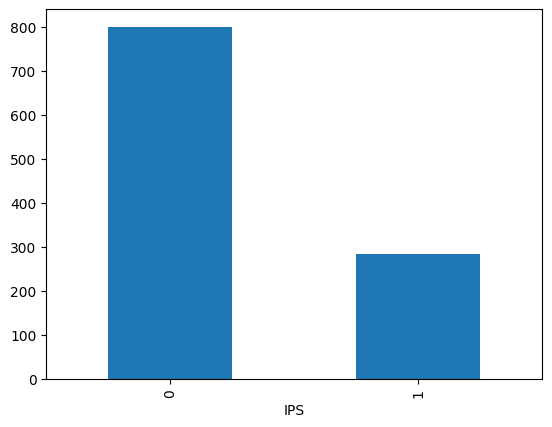

In [26]:
df['IPS'].value_counts().plot(kind = 'bar') # To see number of IPS and non-IPS laptops

<Axes: xlabel='IPS', ylabel='Price'>

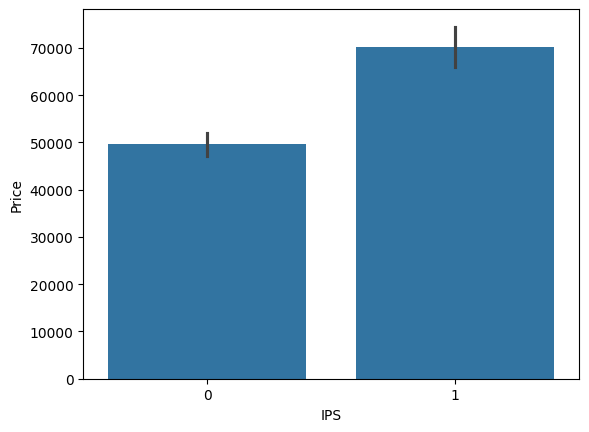

In [27]:
sns.barplot(x = df['IPS'], y = df['Price'])
# There is a strong relation between IPS display and price
# If laptop is IPS display, the price increases

In [28]:
resolutionDf = df['ScreenResolution'].str.split('x', n = 1, expand = True)
resolutionDf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [29]:
df['X_resolution'] = resolutionDf[0]
df['Y_resolution'] = resolutionDf[1]

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory(in GB),Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [31]:
df['X_resolution'] = df['X_resolution'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x : x[0])

In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory(in GB),Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [33]:
df['X_resolution'] = df['X_resolution'].astype('int64')
df['Y_resolution'] = df['Y_resolution'].astype('int64')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1084 non-null   object 
 1   TypeName          1084 non-null   object 
 2   Inches            1084 non-null   float64
 3   ScreenResolution  1084 non-null   object 
 4   Cpu               1084 non-null   object 
 5   Ram               1084 non-null   int64  
 6   Memory(in GB)     1084 non-null   object 
 7   Gpu               1084 non-null   object 
 8   OpSys             1084 non-null   object 
 9   Weight            1084 non-null   float64
 10  Price             1084 non-null   float64
 11  Touchscreen       1084 non-null   int64  
 12  IPS               1084 non-null   int64  
 13  X_resolution      1084 non-null   int64  
 14  Y_resolution      1084 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 127.2+ KB


<Axes: xlabel='X_resolution', ylabel='Price'>

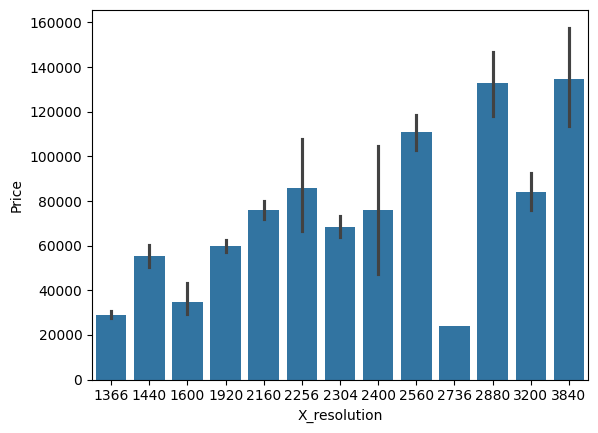

In [35]:
sns.barplot(x = df['X_resolution'], y = df['Price'])

<Axes: xlabel='Y_resolution', ylabel='Price'>

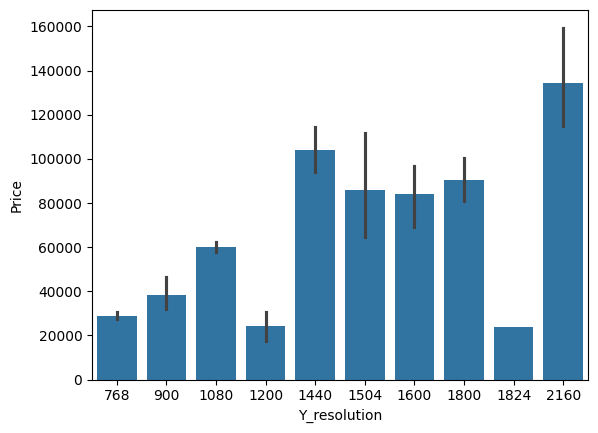

In [36]:
sns.barplot(x = df['Y_resolution'], y = df['Price'])

##### There seems to be a strong relation between price and resolution

In [37]:
# Let us find the PPI i.e. Pixel per inche
# Formula : PPI = sqrt((x-resolution)**2 + (y-resolution)**2)

In [38]:
df['PPI'] = ((((df['Y_resolution'] ** 2) + (df['Y_resolution'] ** 2)) ** 0.5) / df['Inches']).astype('float64')

In [39]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory(in GB),Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,170.130955
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,95.698662
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,97.907093
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,165.297689
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,170.130955


In [40]:
df.drop(columns = ['ScreenResolution', 'Inches', 'X_resolution' , 'Y_resolution'], inplace = True) # We do not need these now

In [41]:
df.head()

,Company,TypeName,Cpu,Ram,Memory(in GB),Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,170.130955
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,95.698662
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,97.907093
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,165.297689
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,170.130955


In [42]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     181
Intel Core i7 7500U 2.7GHz     125
Intel Core i5 6200U 2.3GHz      65
Intel Core i5 8250U 1.6GHz      64
Intel Core i3 6006U 2GHz        63
                              ... 
AMD E-Series E2-9000 2.2GHz      1
AMD E-Series 6110 1.5GHz         1
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.7GHz             1
Name: count, Length: 110, dtype: int64

In [43]:
df['CPU_Name'] = df['Cpu'].apply(lambda x :" ".join(x.split()[0 : 3]))

In [44]:
df.head()

,Company,TypeName,Cpu,Ram,Memory(in GB),Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,170.130955,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,95.698662,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,97.907093,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,165.297689,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,170.130955,Intel Core i5


In [45]:
def findCPU(cpu):
    if cpu == 'Intel Core i7' or cpu == 'Intel Core i5' or cpu == 'Intel Core i3':
        return cpu
    else:
        if cpu.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [46]:
df['CPU_Brand'] = df['CPU_Name'].apply(findCPU)

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory(in GB),Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,CPU_Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,170.130955,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,95.698662,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,97.907093,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,165.297689,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,170.130955,Intel Core i5,Intel Core i5


<Axes: xlabel='CPU_Brand'>

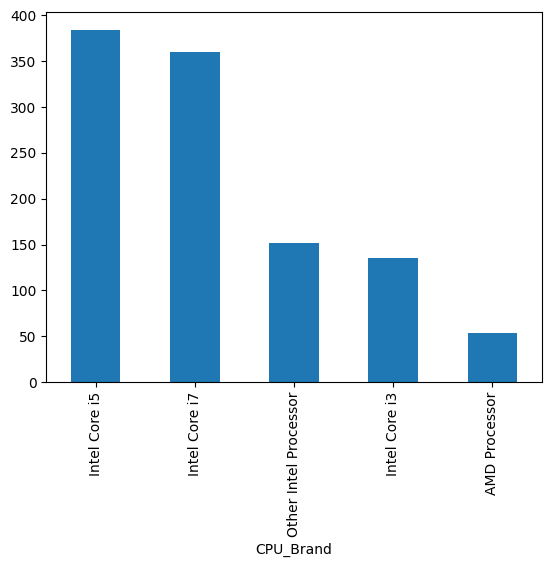

In [48]:
df['CPU_Brand'].value_counts().plot(kind = 'bar') # To see counts of different types of CPU

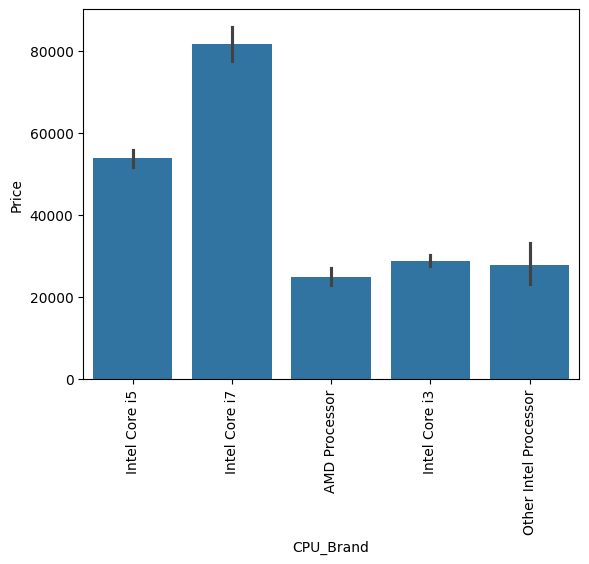

In [49]:
sns.barplot(x = df['CPU_Brand'], y = df['Price']) # To see how price varies with CPU
plt.xticks(rotation = 'vertical')
plt.show()

In [50]:
df.drop(columns = ['Cpu', 'CPU_Name'], inplace = True)

In [51]:
df.head()

,Company,TypeName,Ram,Memory(in GB),Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Brand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,170.130955,Intel Core i5
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,95.698662,Intel Core i5
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,97.907093,Intel Core i5
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,165.297689,Intel Core i7
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,170.130955,Intel Core i5


<Axes: xlabel='Ram'>

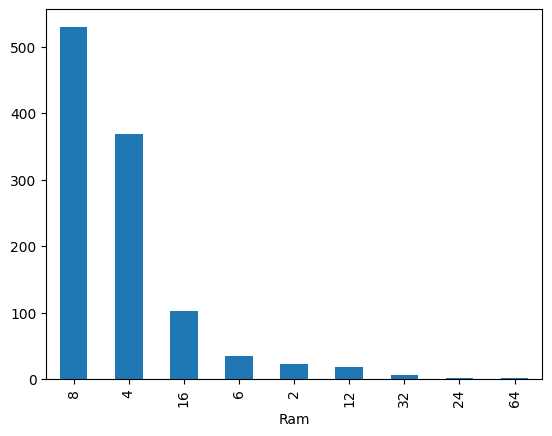

In [52]:
df['Ram'].value_counts().plot(kind = 'bar')

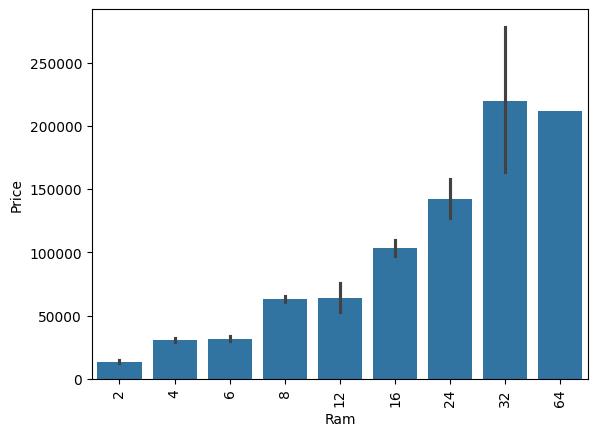

In [53]:
sns.barplot(x = df['Ram'], y = df['Price']) # To see how price varies with Ram
plt.xticks(rotation = 'vertical')
plt.show()

In [54]:
df['Memory(in GB)'].value_counts()

Memory(in GB)
256 SSD              412
1000 HDD             223
500 HDD              132
512 SSD              118
128 SSD               76
32 Flash Storage      38
2000 HDD              16
64 Flash Storage      15
1000 SSD              14
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
64 SSD                 1
32 HDD                 1
128 HDD                1
240 SSD                1
8 SSD                  1
Name: count, dtype: int64

In [55]:
df.head()

,Company,TypeName,Ram,Memory(in GB),Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Brand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,170.130955,Intel Core i5
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,95.698662,Intel Core i5
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,97.907093,Intel Core i5
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,165.297689,Intel Core i7
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,170.130955,Intel Core i5


In [56]:
df['hasHDD'] = df['Memory(in GB)'].apply(lambda x: 1 if "HDD" in x else 0)
df['hasSSD'] = df['Memory(in GB)'].apply(lambda x: 1 if "SSD" in x else 0)
df['hasFlash'] = df['Memory(in GB)'].apply(lambda x: 1 if "Flash Storage" in x else 0)
# To know which type of memory is begin used and to convert it into numerical columns

In [57]:
df[['MemSize', 'MemType']] = df['Memory(in GB)'].str.split(' ', n = 1, expand=True)
df['MemSize'] = df['MemSize'].astype(int) # Making a numerical column with memory size

In [58]:
df.head()

,Company,TypeName,Ram,Memory(in GB),Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Brand,hasHDD,hasSSD,hasFlash,MemSize,MemType
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,170.130955,Intel Core i5,0,1,0,128,SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,95.698662,Intel Core i5,0,0,1,128,Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,97.907093,Intel Core i5,0,1,0,256,SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,165.297689,Intel Core i7,0,1,0,512,SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,170.130955,Intel Core i5,0,1,0,256,SSD


In [59]:
df['HDD'] = (df['MemSize'] * df['hasHDD'])
df['SSD'] = (df['MemSize'] * df['hasSSD'])
df['Flash Storage'] = (df['MemSize'] * df['hasFlash'])

In [60]:
df.drop(columns = ['Memory(in GB)', 'hasSSD', 'hasHDD', 'hasFlash' , 'MemSize', 'MemType'], inplace = True) # We do no need these now

In [61]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD,Flash Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,170.130955,Intel Core i5,0,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,95.698662,Intel Core i5,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,97.907093,Intel Core i5,0,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,165.297689,Intel Core i7,0,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,170.130955,Intel Core i5,0,256,0


In [62]:
df['Flash Storage'].value_counts()
# It seems to be of no use

Flash Storage
0      1010
32       38
64       15
256       8
16        7
128       4
512       2
Name: count, dtype: int64

In [63]:
df.drop(columns = ['Flash Storage'], inplace = True)

In [64]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,170.130955,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,95.698662,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,97.907093,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,165.297689,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,170.130955,Intel Core i5,0,256


In [65]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620     278
Intel HD Graphics 520     182
Intel UHD Graphics 620     64
Intel HD Graphics 500      39
Intel HD Graphics 400      37
                         ... 
AMD Radeon R5 520           1
AMD Radeon R7               1
Intel HD Graphics 540       1
AMD Radeon 540              1
ARM Mali T860 MP4           1
Name: count, Length: 99, dtype: int64

In [66]:
df['Gpu'] = df['Gpu'].apply(lambda x : x.split()[0]) # We will only take the brand name, since we do not have much information about the GPU

In [67]:
df['Gpu'].value_counts()

Gpu
Intel     711
Nvidia    227
AMD       145
ARM         1
Name: count, dtype: int64

In [68]:
df = df[df['Gpu'] != 'ARM'] # A single ARM will not really matter so remove it

In [69]:
df['Gpu'].value_counts()

Gpu
Intel     711
Nvidia    227
AMD       145
Name: count, dtype: int64

In [70]:
df = df.rename(columns = {'Gpu' : 'GPU'}) # Just because

In [71]:
df.head()

,Company,TypeName,Ram,GPU,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,170.130955,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,95.698662,Intel Core i5,0,0
2,HP,Notebook,8,Intel,No OS,1.86,30636.0000,0,0,97.907093,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195.3360,0,1,165.297689,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095.8080,0,1,170.130955,Intel Core i5,0,256


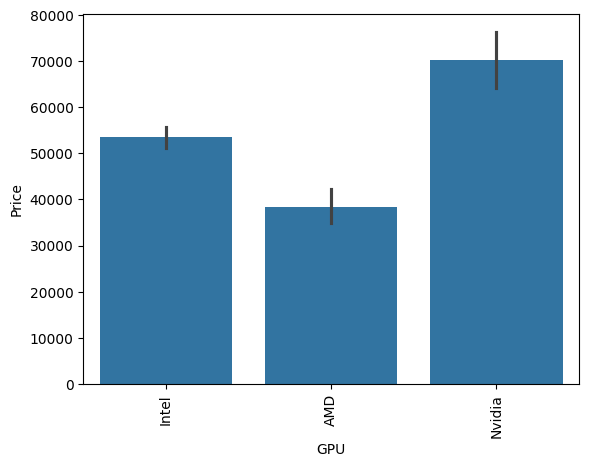

In [72]:
sns.barplot(x = df['GPU'], y = df['Price']) # To see how price varies with GPU
plt.xticks(rotation = 'vertical')
plt.show()

In [73]:
df['OpSys'].value_counts()

OpSys
Windows 10      863
No OS            62
Linux            59
Windows 7        42
Chrome OS        26
macOS            13
Mac OS X          8
Windows 10 S      8
Android           2
Name: count, dtype: int64

In [74]:
def giveOS(OS):
    if OS == 'Windows 10' or OS == 'Windows 7' or OS == 'Windows 10 S':
        return 'Windows'
    elif OS == 'macOS' or OS == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'
# Combining some of the categories to for simplification

In [75]:
df['OS'] = df['OpSys'].apply(giveOS) # Creating a new column which tells us about the Operating System

In [76]:
df.head()

,Company,TypeName,Ram,GPU,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD,OS
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,170.130955,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,95.698662,Intel Core i5,0,0,Mac
2,HP,Notebook,8,Intel,No OS,1.86,30636.0000,0,0,97.907093,Intel Core i5,0,256,Others
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195.3360,0,1,165.297689,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095.8080,0,1,170.130955,Intel Core i5,0,256,Mac


In [77]:
df.drop(columns = ['OpSys'], inplace = True) # We do not need this anymore

In [78]:
df.head()
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer', 'MSI',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

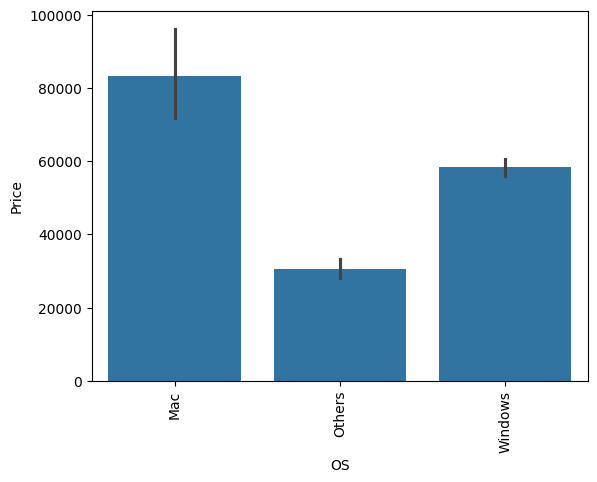

In [79]:
sns.barplot(x = df['OS'], y = df['Price']) # To see how price varies with OS
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

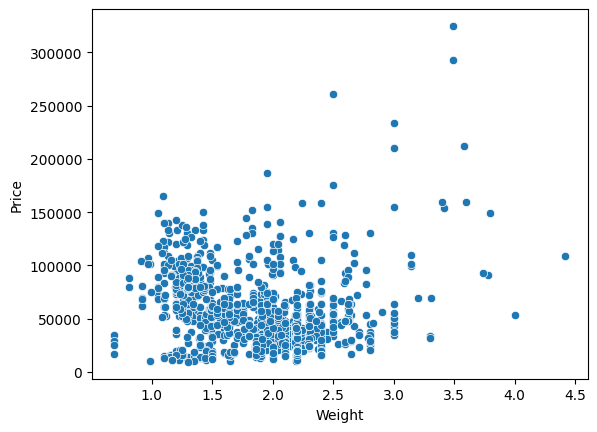

In [80]:
sns.scatterplot(x = df['Weight'], y = df['Price'])
# Weak linear relationship with weight

## Actual Algorithms

In [81]:
X = df.drop(columns = ['Price'])
y = np.log(df['Price'])

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

### Linear Regression

In [85]:
step1 = ColumnTransformer(transformers = [
    ('column_transformer', OneHotEncoder(), [0, 1, 3, 8, 11])
], remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score : ', r2_score(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))

R2 Score :  0.823929393967983
MAE :  0.2085601871532207


### Decision Tree

In [86]:
step1 = ColumnTransformer(transformers=[
    ('column_transformer',OneHotEncoder(), [0, 1, 3, 8, 11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(y_test, y_pred))

R2 score 0.8034751357561962
MAE 0.20577699304442593


### SVM

In [87]:
step1 = ColumnTransformer(transformers=[
    ('column_transformer',OneHotEncoder(),[0, 1, 3, 8, 11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=20000)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test, y_pred))
print('MAE',mean_absolute_error(y_test, y_pred))

R2 score 0.8459271338795086
MAE 0.19197253274225257


In [88]:
np.exp(pipe.predict([['Apple', 'Ultrabook', '8', 'Intel', '1.4', '0', '1', '170.130955', 'Intel Core i7', '0', '256', 'Mac']]))
## Trying to predict price of a random laptop after converting back form log

C:\Users\devan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([88376.92259049])

In [89]:
np.exp(pipe.predict([['Razer', 'Gaming', '16', 'Nvidia', '2.4', '0', '1', '200', 'Intel Core i7', '0', '512', 'Windows']]))

C:\Users\devan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([117204.27419735])